# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Nolan Moss

#### GitHub Repo: https://github.com/Crusoe22/web-scraping-module6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

### Code to Fetch and Save HTML Content from a Webpage

This Python script fetches the HTML content of an article from a URL, and then saves it to a `.pkl` file for later use. The article is retrieved from the Wayback Machine, specifically the page: "How Laser Headlights Work" on Hackaday.


In [13]:
import requests
import pickle

# Define the URL to fetch
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"


# Fetch the HTML content
response = requests.get(url)
response.raise_for_status()  # Raise an error if the request was unsuccessful

# Extract the HTML content
html_content = response.text

# Save the HTML content to a .pkl file
with open("article_html.pkl", "wb") as file:
    pickle.dump(html_content, file)
print("HTML content saved to article_html.pkl successfully!")


HTML content saved to article_html.pkl successfully!


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

### Code to Load and Extract Text from Saved HTML Content

This Python script loads the previously saved HTML content from a `.pkl` file, parses it using BeautifulSoup, and extracts the plain text from the webpage.


In [14]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the text content
text_content = soup.get_text()
print(text_content)


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Code to Extract and Count the Most Frequent Tokens from HTML Content

This Python script loads saved HTML content from a `.pkl` file, extracts the text using BeautifulSoup, processes the text with spaCy, filters out unnecessary tokens, and then counts the frequency of the most common tokens.



In [15]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML and extract text
soup = BeautifulSoup(html_content, "html.parser")
text_content = soup.get_text()

# Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the text content with spaCy
doc = nlp(text_content)

# Filter tokens (convert to lowercase, remove punctuation, stopwords, and whitespace)
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print results
print("5 Most Frequent Tokens (excluding punctuation, stopwords, and whitespace):")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")


5 Most Frequent Tokens (excluding punctuation, stopwords, and whitespace):
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Code to Extract and Count the Most Frequent Lemmas from HTML Content

This Python script loads saved HTML content from a `.pkl` file, extracts the text using BeautifulSoup, processes the text with spaCy, filters out unnecessary lemmas, and then counts the frequency of the most common lemmas.


In [16]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Step 1: Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML and extract text
soup = BeautifulSoup(html_content, "html.parser")
text_content = soup.get_text()

# Step 3: Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the text content with spaCy
doc = nlp(text_content)

# Step 5: Extract and filter lemmas (remove punctuation, stopwords, whitespace)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

# Step 6: Count lemma frequencies
lemma_freq = Counter(lemmas)

# Step 7: Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Step 8: Print results
print("5 Most Frequent Lemmas (excluding punctuation, stopwords, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


5 Most Frequent Lemmas (excluding punctuation, stopwords, and whitespace):
Lemma: comment, Frequency: 157
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

### Code to Score Sentences by Tokens and Lemmas

This Python code defines two functions to score a sentence based on the presence of **interesting tokens** and **interesting lemmas**. It calculates the proportion of these words in the sentence and then uses spaCy to process the article text and calculate the scores for the first sentence.


In [17]:
import spacy

# Define scoring by token
def score_sentence_by_token(sentence, interesting_tokens):

    tokens = [token.text.lower() for token in sentence if not token.is_space]
    if len(tokens) == 0:
        return 0
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# Define scoring by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):

    lemmas = [token.lemma_.lower() for token in sentence if not token.is_space]
    if len(lemmas) == 0:
        return 0
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return interesting_count / len(lemmas)

# Load the article text and process it with spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_content)

# Get the first sentence of the article
first_sentence = list(doc.sents)[0]

# Interesting tokens and lemmas (use the most frequent ones identified earlier)
interesting_tokens = ["comment", "2021", "march", "says", "report"]  # From Q3 
interesting_lemmas = ["comment", "2021", "march", "say", "report"]  # From Q4

# Calculate scores
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print results
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")


Token Score: 0.078125
Lemma Score: 0.09375


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Code Explanation: Computing and Plotting Token-Based Sentence Scores

The following code calculates the proportion of "interesting" tokens (as defined in the `interesting_tokens` list) for every sentence in the article and then visualizes the distribution of these scores using a histogram.


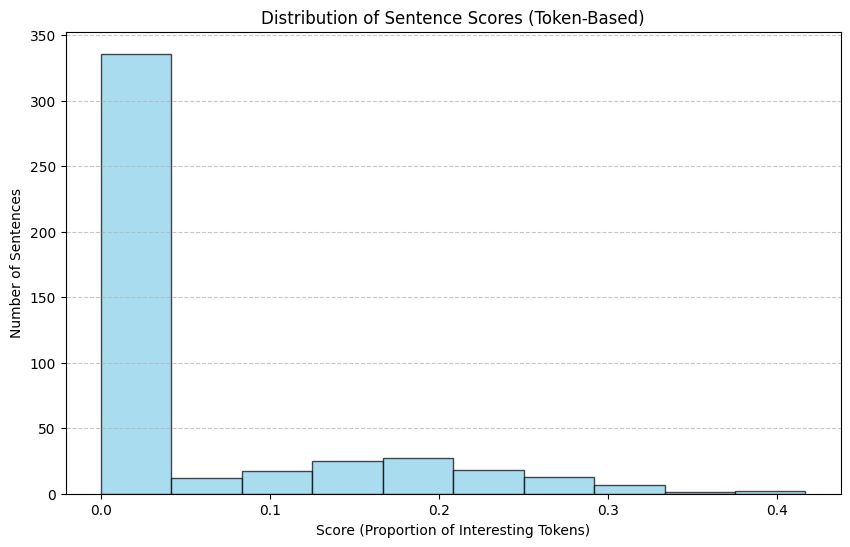

In [18]:
import matplotlib.pyplot as plt

# Step 1: Compute scores for every sentence
sentence_scores = [
    score_sentence_by_token(sentence, interesting_tokens) for sentence in doc.sents
]

# Step 2: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Scores (Token-Based)")
plt.xlabel("Score (Proportion of Interesting Tokens)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment on the most common range of scores
# The most common range of scores appears to be between 0.0 and 0.05, 
# indicating that most sentences contain few interesting tokens.


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Code Explanation: Computing and Plotting Lemma-Based Sentence Scores

The following code calculates the proportion of "interesting" lemmas (as defined in the `interesting_lemmas` list) for every sentence in the article and then visualizes the distribution of these scores using a histogram.


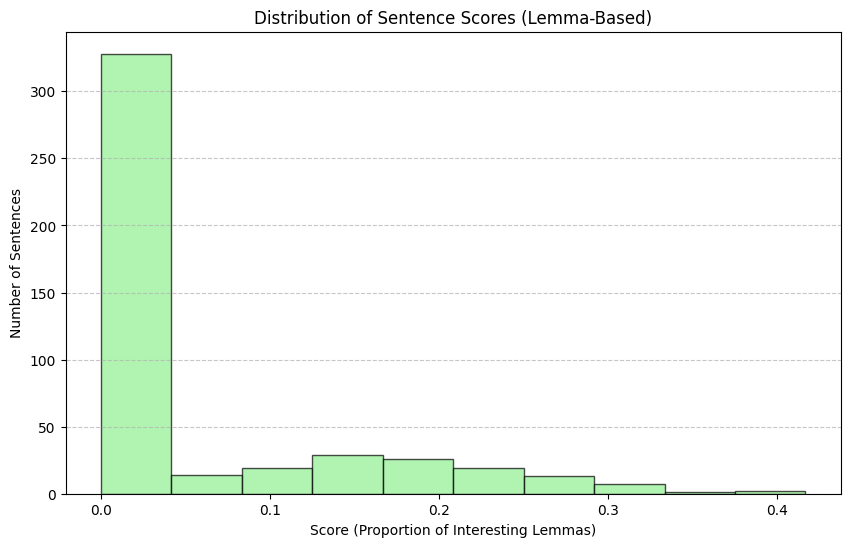

In [19]:
# Step 1: Compute scores for every sentence using lemmas
sentence_lemma_scores = [
    score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in doc.sents
]

# Step 2: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_lemma_scores, bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Scores (Lemma-Based)")
plt.xlabel("Score (Proportion of Interesting Lemmas)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment on the most common range of scores
# The most common range of scores appears to be between 0.0 and 0.05,
# indicating that most sentences contain few interesting lemmas.


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Everything would be ommitted besides "comment" and "report" from question 3 and 4 if we only wanted to consider nouns as interesting words. To modify the code to only consider nouns, you need to filter the tokens or lemmas based on their part-of-speech (POS) tags. In spaCy, nouns are typically tagged with POS labels such as "NOUN" or "PROPN" (for proper nouns).